## EDA

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('participants.tsv', sep='\t', header=0)

In [8]:
df.columns

Index(['participant_id', 'Gender', 'Age', 'SessionOrder',
       'EEG_SamplingTime_Open_NS', 'EEG_SamplingTime_Closed_NS',
       'EEG_SamplingTime_Open_SD', 'EEG_SamplingTime_Closed_SD',
       'PVT_SamplingTime_NS', 'PVT_SamplingTime_SD', 'PVT_item1_NS',
       'PVT_item2_NS', 'PVT_item3_NS', 'PVT_item1_SD', 'PVT_item2_SD',
       'PVT_item3_SD', 'PANAS_P_NS', 'PANAS_P_SD', 'PANAS_N_NS', 'PANAS_N_SD',
       'ATQ_NS', 'ATQ_SD', 'SAI_NS', 'SAI_SD', 'SSS_NS', 'SSS_SD', 'KSS_NS',
       'KSS_SD', 'SleepDiary_item1_NS', 'SleepDiary_item2_NS',
       'SleepDiary_item3_NS', 'EQ', 'Buss_Perry', 'PSQI_GlobalScore',
       'PSQI_item1', 'PSQI_item2', 'PSQI_item3', 'PSQI_item4', 'PSQI_item5',
       'PSQI_item6', 'PSQI_item7'],
      dtype='object')

#### Acronyms used:
- PVT: Psychomotor Vigilance Task
- PANAS: Positive and Negative Affect Schedule
- ATQ: Automatic Thoughts Questionnaire
- SAI: State Anxiety Inventory
- SSS: Stanford Sleepiness Scale
- KSS: Karolinska Sleepiness Scale
- PSQI: Pittsburgh Sleep Quality Index

In [9]:
df.isnull().sum() # check number of null values in each column

participant_id                 0
Gender                         0
Age                            0
SessionOrder                   0
EEG_SamplingTime_Open_NS       0
EEG_SamplingTime_Closed_NS    33
EEG_SamplingTime_Open_SD       0
EEG_SamplingTime_Closed_SD    33
PVT_SamplingTime_NS           34
PVT_SamplingTime_SD           35
PVT_item1_NS                  40
PVT_item2_NS                  40
PVT_item3_NS                  40
PVT_item1_SD                  34
PVT_item2_SD                  34
PVT_item3_SD                  34
PANAS_P_NS                     0
PANAS_P_SD                     3
PANAS_N_NS                     0
PANAS_N_SD                     3
ATQ_NS                        44
ATQ_SD                        46
SAI_NS                        40
SAI_SD                        40
SSS_NS                        33
SSS_SD                        34
KSS_NS                        38
KSS_SD                        38
SleepDiary_item1_NS           18
SleepDiary_item2_NS           18
SleepDiary

In [10]:
df['Age'].describe() # age of participants ranges from 17 to 23

count    71.0000
mean     20.0000
std       1.4442
min      17.0000
25%      19.0000
50%      20.0000
75%      21.0000
max      23.0000
Name: Age, dtype: float64

In [11]:
df['Gender'].value_counts() # relatively equal in terms of gender distribution

Gender
M    37
F    34
Name: count, dtype: int64

Next, to find the actual hours of sleep for each participant, we can find the difference between 
SleepDiary_item2_NS and SleepDiary_item1_NS. We also want to consider their SleepDiary_item3_NS
sleep quality. 

In [44]:
sleeptime = list(df['SleepDiary_item1_NS'])
waketime = list(df['SleepDiary_item2_NS'])
timedif = list()
date_format = '%H:%M'
for i in range(0, len(sleeptime)):
    sleeptime[i] = str(sleeptime[i])
    waketime[i] = str(waketime[i])
    #skip null values
    if sleeptime[i].upper() == 'NAN' or waketime[i].upper() == 'NAN':
        timedif.append('NaN')
        continue

    #format it to be xx:yy, prolly could do str.split but im braindead lmao
    if sleeptime[i][1] == ':':
        sleeptime[i] = '0' + sleeptime[i]
    if waketime[i][1] == ':':
        waketime[i] = '0' + waketime[i]

    #deal with wraparound, just add 12 to both so they're in same day
    if int(sleeptime[i][0:2]) > 18:
        sleeptime[i] = str((int(sleeptime[i][0:2]) + 12)%24) + sleeptime[i][2:]
        waketime[i] = str((int(waketime[i][0:2]) + 12)%24) + waketime[i][2:]

    #format it to be xx:yy again
    if sleeptime[i][1] == ':':
        sleeptime[i] = '0' + sleeptime[i]
    if waketime[i][1] == ':':
        waketime[i] = '0' + waketime[i]

    mindiff = int(waketime[i][3:]) - int(sleeptime[i][3:])
    if mindiff < 0:
        mindiff = mindiff%60
        hrdiff = int(waketime[i][0:2]) - int(sleeptime[i][0:2]) - 1
    else:
        hrdiff = int(waketime[i][0:2]) - int(sleeptime[i][0:2])
    if len(str(mindiff)) == 1:
        mindiff = '0' + str(mindiff)
    #get actual difference between times
    timedif.append("{h}:{m}".format(h = hrdiff, m = mindiff))
df['Sleep_time'] = timedif
print(timedif)


['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '8:10', '6:00', '7:57', '7:49', '8:35', '8:10', '8:02', '6:30', '9:00', '8:30', '7:50', '7:40', '8:00', '8:40', '7:30', '7:00', '8:30', '7:00', '5:10', '7:20', '8:40', '7:10', '7:22', '6:10', '4:40', '7:50', 'NaN', '7:25', '7:51', '7:00', '9:00', '7:30', '6:57', '8:13', '8:55', '9:43', '6:50', '8:08', '6:55', '6:00', '8:40', '8:32', '7:10', '6:40', '6:04', '8:50', '9:48', 'NaN', '8:58', '8:00', 'NaN', '10:00', '7:00', '8:40', '7:30', '3:15', 'NaN', 'NaN']


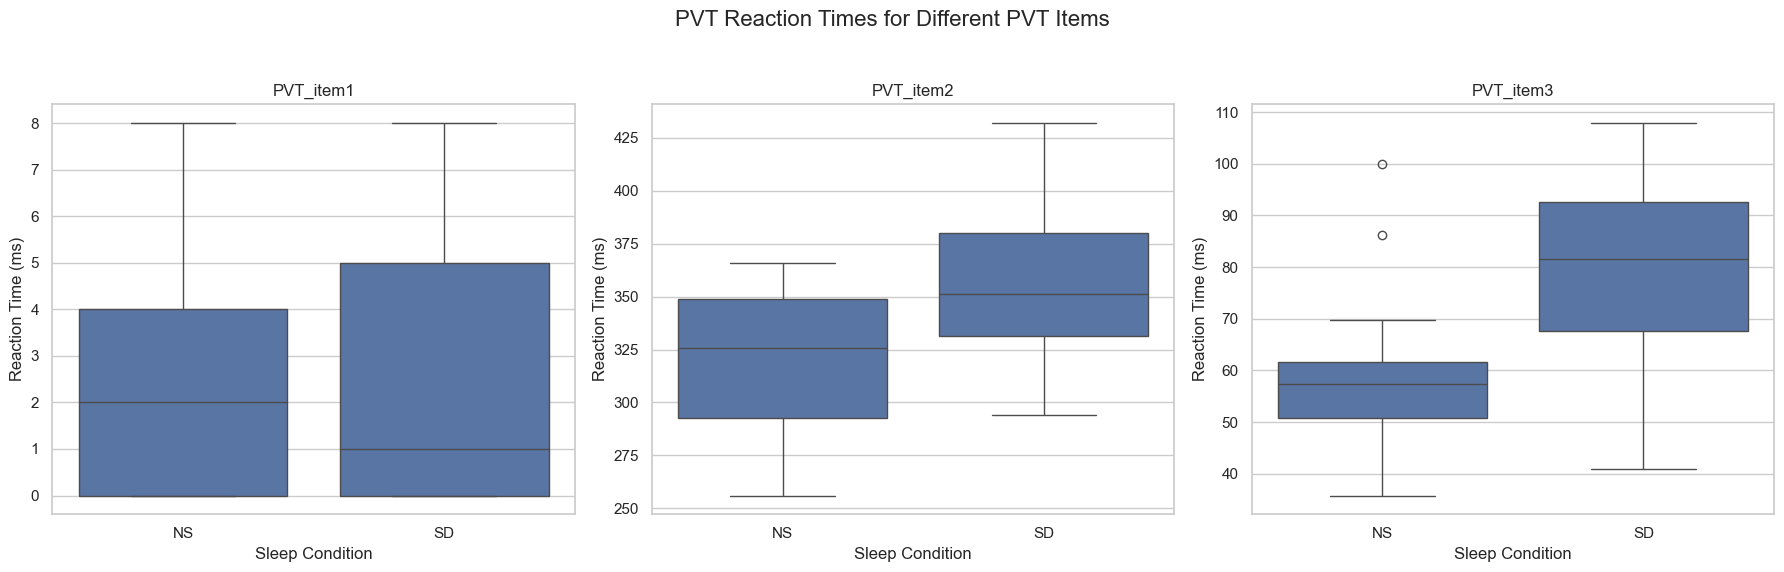

In [49]:
# null values automatically ignored when plotting
df_long = pd.melt(df[['PVT_item1_NS', 'PVT_item1_SD', 'PVT_item2_NS', 'PVT_item2_SD', 'PVT_item3_NS', 'PVT_item3_SD']], var_name='Condition', value_name='Reaction Time')
df_long['Item'] = df_long['Condition'].str.extract(r'(PVT_item\d+)_')[0]
df_long['Condition'] = df_long['Condition'].str.extract(r'_(NS|SD)')[0]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
fig.suptitle('PVT Reaction Times for Different PVT Items', fontsize=16)

items = df_long['Item'].unique()
for i, item in enumerate(items):
    ax = axes[i]
    sns.boxplot(x='Condition', y='Reaction Time', data=df_long[df_long['Item'] == item], ax=ax)
    ax.set_title(f"{item}")
    ax.set_xlabel("Sleep Condition")
    ax.set_ylabel("Reaction Time (ms)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Performance on the PVT: more distinct differences between the normal sleep and sleep deprivation conditions on PVT item 2 and item 3.